Q1 Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

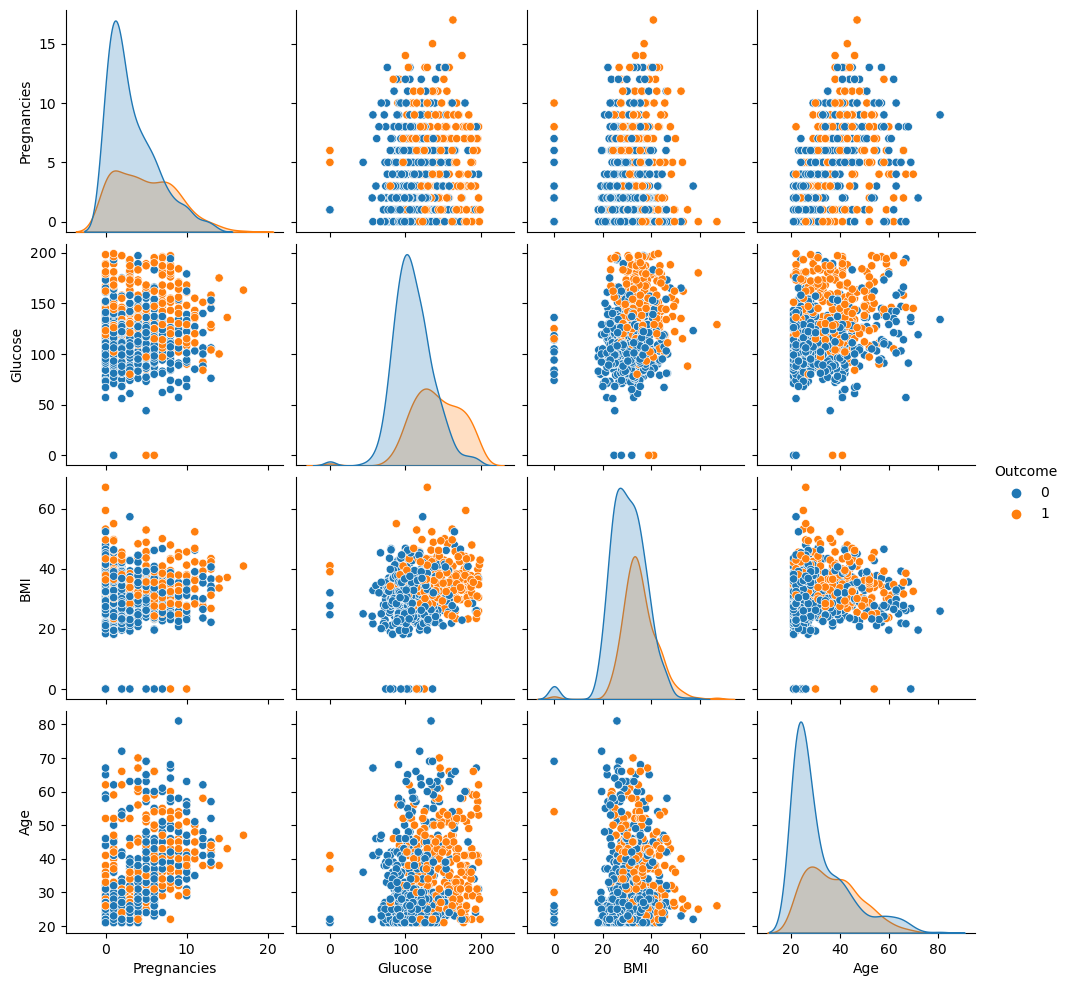

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display basic statistics
print(data.describe())

# Select a subset of variables for the pair plot
selected_vars = ['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']

# Create a pair plot with the selected variables
sns.pairplot(data[selected_vars], hue='Outcome', diag_kind='kde')
plt.show()

Q2 Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [2]:
# Handle missing values
data.dropna(inplace=True)

# Remove outliers using appropriate techniques like z-score or IQR

# Transform categorical variables into dummy variables if necessary
# (If there are categorical variables, convert them using pd.get_dummies())

# Check for any remaining issues with the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Use a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters to search through
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the decision tree with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

 Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.76
Precision: 0.68
Recall: 0.62
F1 Score: 0.65
Confusion Matrix:
[[83 16]
 [21 34]]


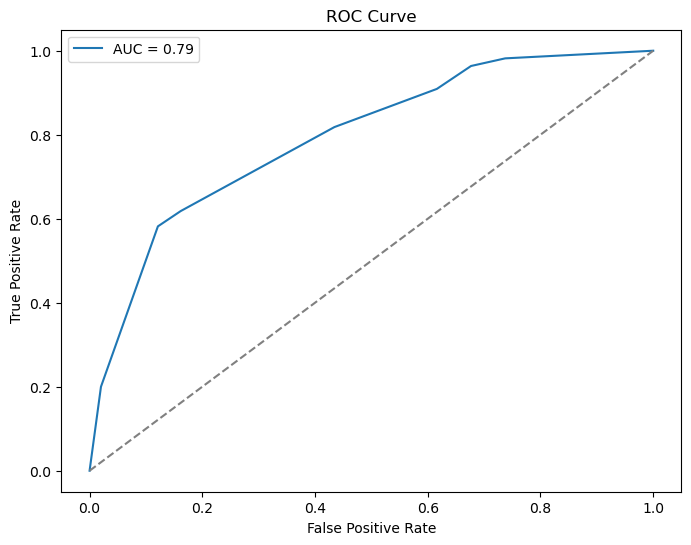

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

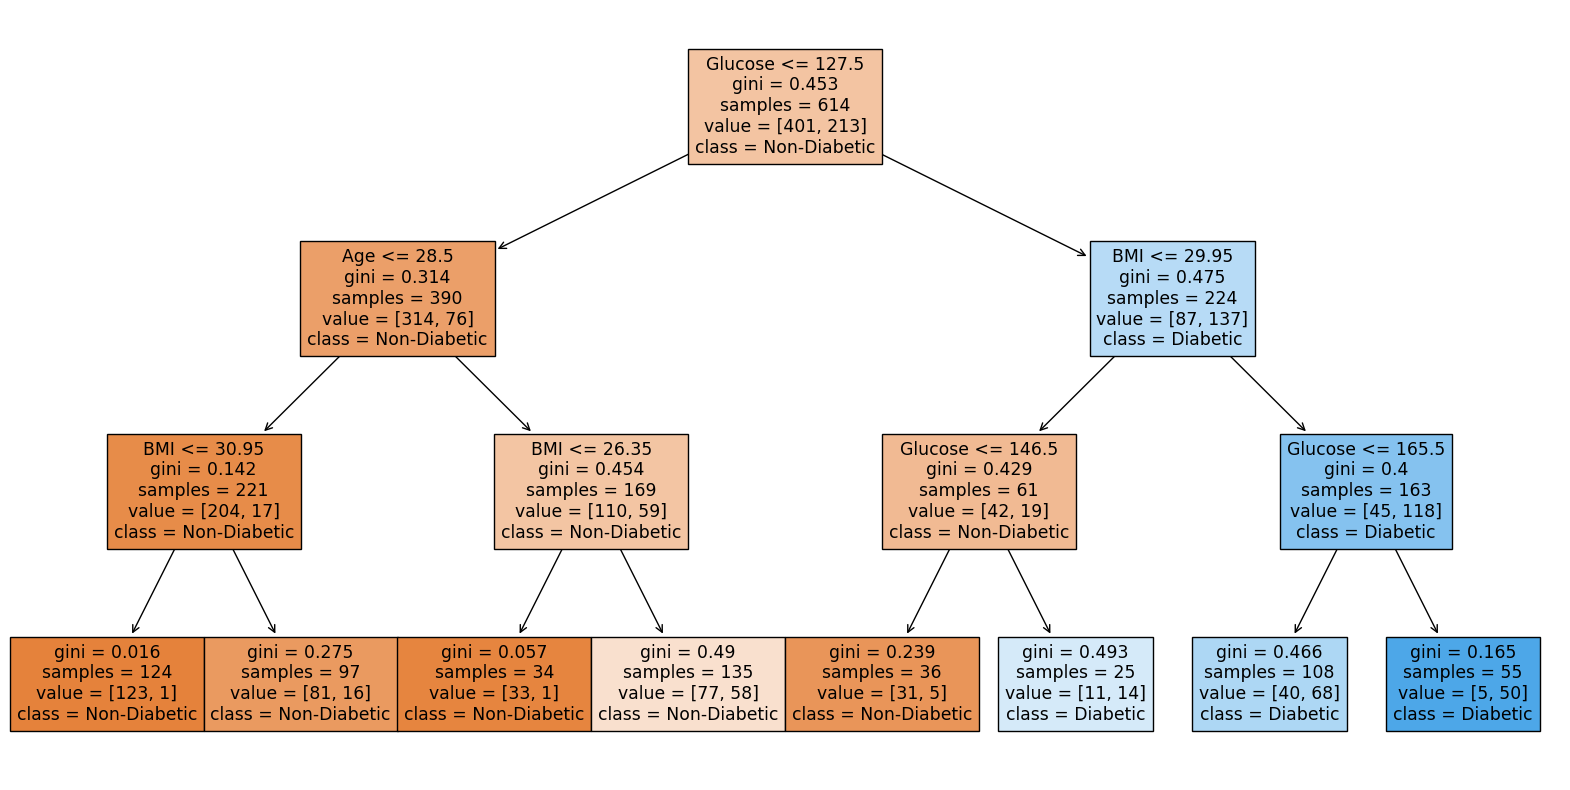

In [6]:
# Display the decision tree (if not too deep)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [7]:
from sklearn.model_selection import train_test_split

X_New = data.drop('Outcome', axis=1)
y_New = data['Outcome']

# Use a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_New, y_New, test_size=0.2, random_state=42)


In [8]:
# Assuming you have new data (X_new) for validation
y_pred_new = best_dt_classifier.predict(X_New)

# Evaluate the performance on new data using the same metrics as before
# (accuracy, precision, recall, f1_score, confusion_matrix, ROC curve)
# Example of changing the threshold for classification
threshold = 0.6
y_pred_threshold = (best_dt_classifier.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Evaluate performance with the new threshold
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)

# Display metrics with the new threshold
print(f"Accuracy (Threshold {threshold}): {accuracy_threshold:.2f}")
print(f"Precision (Threshold {threshold}): {precision_threshold:.2f}")
print(f"Recall (Threshold {threshold}): {recall_threshold:.2f}")
print(f"F1 Score (Threshold {threshold}): {f1_threshold:.2f}")


Accuracy (Threshold 0.6): 0.77
Precision (Threshold 0.6): 0.73
Recall (Threshold 0.6): 0.58
F1 Score (Threshold 0.6): 0.65
